# New section

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras.models as km
from keras.models import Sequential
from keras import activations,initializers,regularizers,constraints
from keras.layers import Dense,Activation
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/winequality-red.csv")

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
x=df.drop(columns=['quality'])
y=df['quality']

In [ ]:
train_X,test_X,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=123)

In [ ]:
train_X.shape

(1119, 11)

In [ ]:
model=Sequential()
model.add(Dense(units=11,kernel_initializer='uniform',activation='relu',input_dim=11))
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=4,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='linear'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237 (948.00 B)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
print(train_X.shape)
print(train_y.shape)

(1119, 11)
(1119,)


In [ ]:
model.fit(train_X,train_y,epochs=50,batch_size=32,validation_split=0.1)
mse=model.evaluate(test_X,test_y)
print(f'Test mean squared error:{mse}')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5179 - val_loss: 0.6435
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5223 - val_loss: 0.6064
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5558 - val_loss: 0.6145
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5249 - val_loss: 0.6253
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5644 - val_loss: 0.6032
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5263 - val_loss: 0.6303
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5185 - val_loss: 0.6012
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5189 - val_loss: 0.5972
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5265 - val_loss: 0.5813
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4863 - val_loss: 0.6042
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5012 - val_loss: 0.5794
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5358 - val_lo

In [ ]:
predictions=model.predict(test_X)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [ ]:
predictions

array([[6.400064 ],
       [5.1222463],
       [5.1054335],
       [6.2588725],
       [5.328832 ],
       [5.6333623],
       [6.1123023],
       [5.5798044],
       [5.592527 ],
       [5.639589 ],
       [5.094781 ],
       [6.5872445],
       [5.7109523],
       [5.9448724],
       [5.8430142],
       [6.0730953],
       [5.118839 ],
       [5.933808 ],
       [5.919584 ],
       [5.3425474],
       [5.9396243],
       [5.7109523],
       [5.6850896],
       [5.345794 ],
       [5.3794065],
       [5.348809 ],
       [5.7962523],
       [5.7321835],
       [5.9890475],
       [5.7303824],
       [5.1053977],
       [6.329956 ],
       [5.416436 ],
       [5.1268125],
       [6.1342134],
       [5.0230165],
       [5.5343075],
       [6.4437604],
       [5.035964 ],
       [5.177905 ],
       [5.4977827],
       [6.060805 ],
       [5.9442945],
       [5.6699023],
       [5.4576263],
       [5.24444  ],
       [5.5051284],
       [5.1066327],
       [5.895715 ],
       [5.5264506],


In [ ]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [ ]:
print(df.describe())



       fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]


In [ ]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


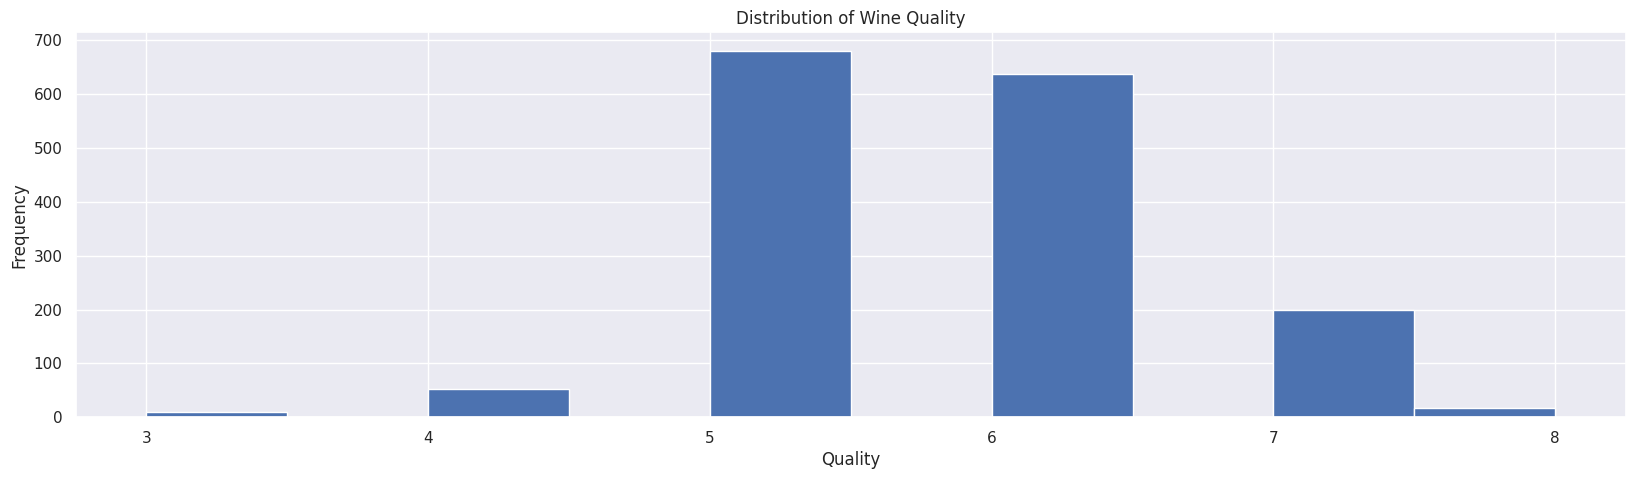

In [ ]:
plt.figure()
plt.hist(df['quality'], bins=10)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

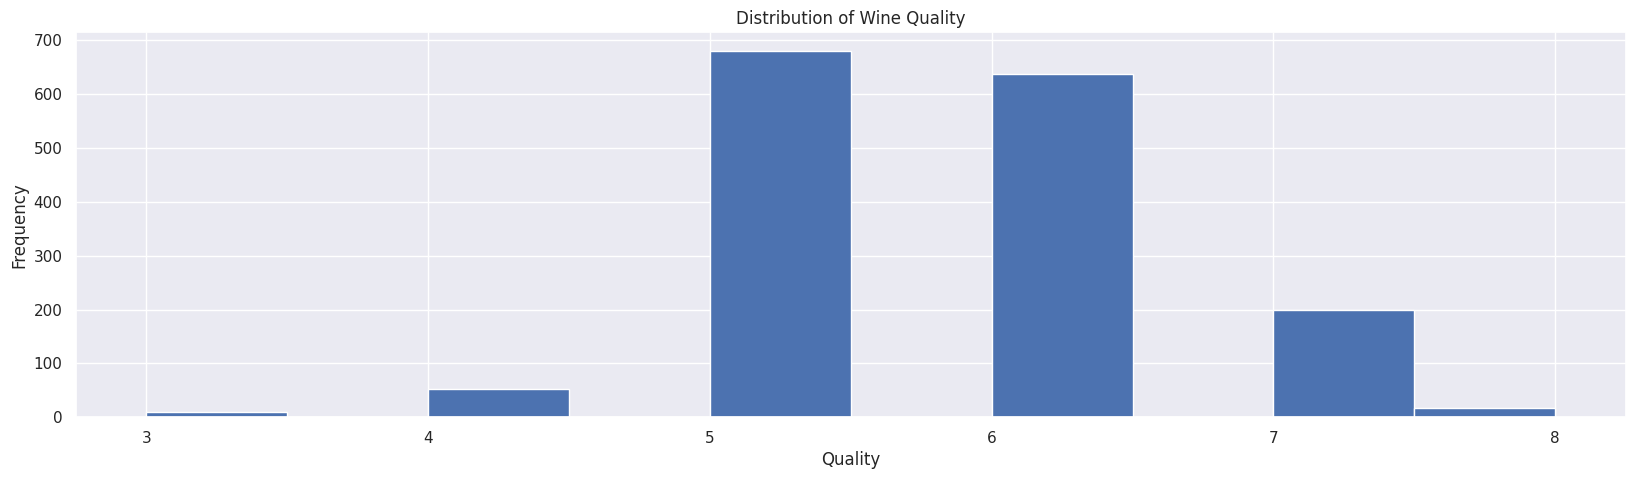

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df['quality'], bins=10)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

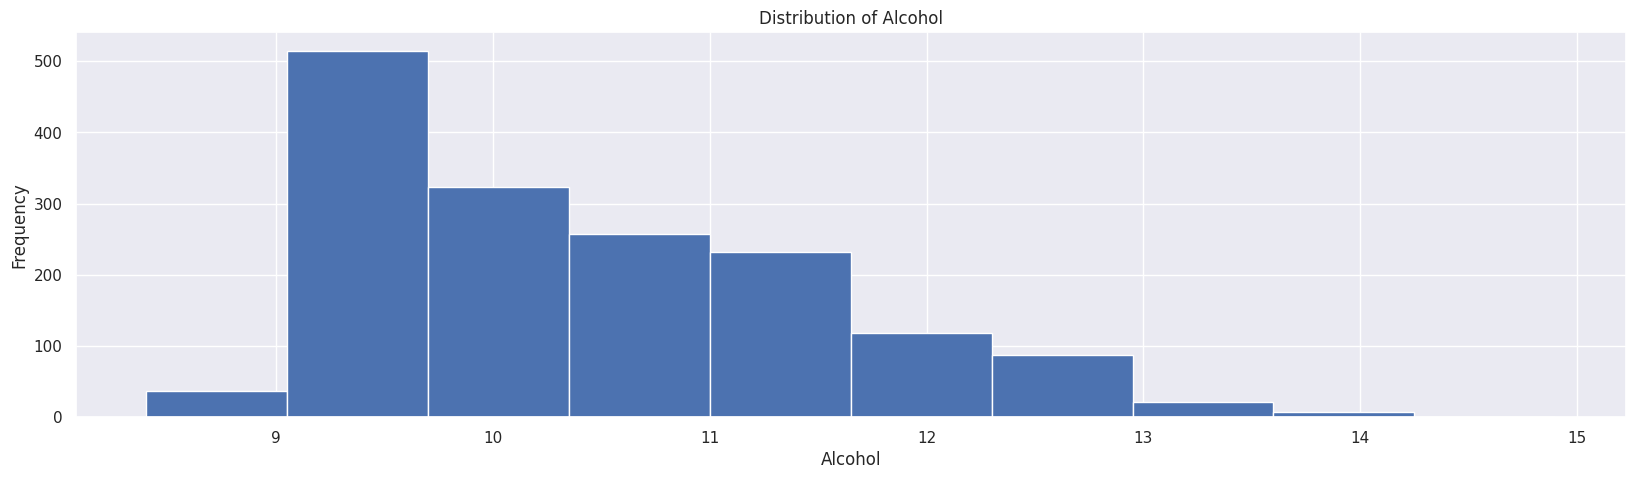

In [ ]:
plt.figure()
plt.hist(df['alcohol'], bins=10)
plt.title("Distribution of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

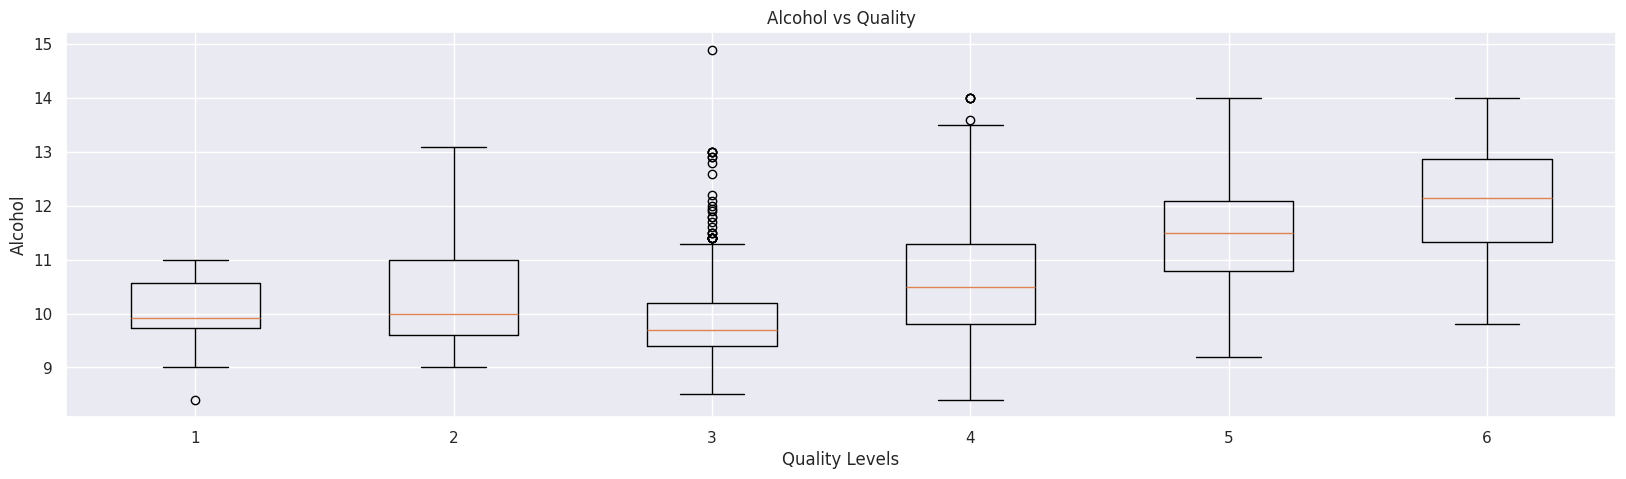

In [ ]:
plt.figure()
quality_levels = sorted(df['quality'].unique())
data = [df[df['quality'] == q]['alcohol'] for q in quality_levels]

plt.boxplot(data)
plt.title("Alcohol vs Quality")
plt.xlabel("Quality Levels")
plt.ylabel("Alcohol")
plt.show()

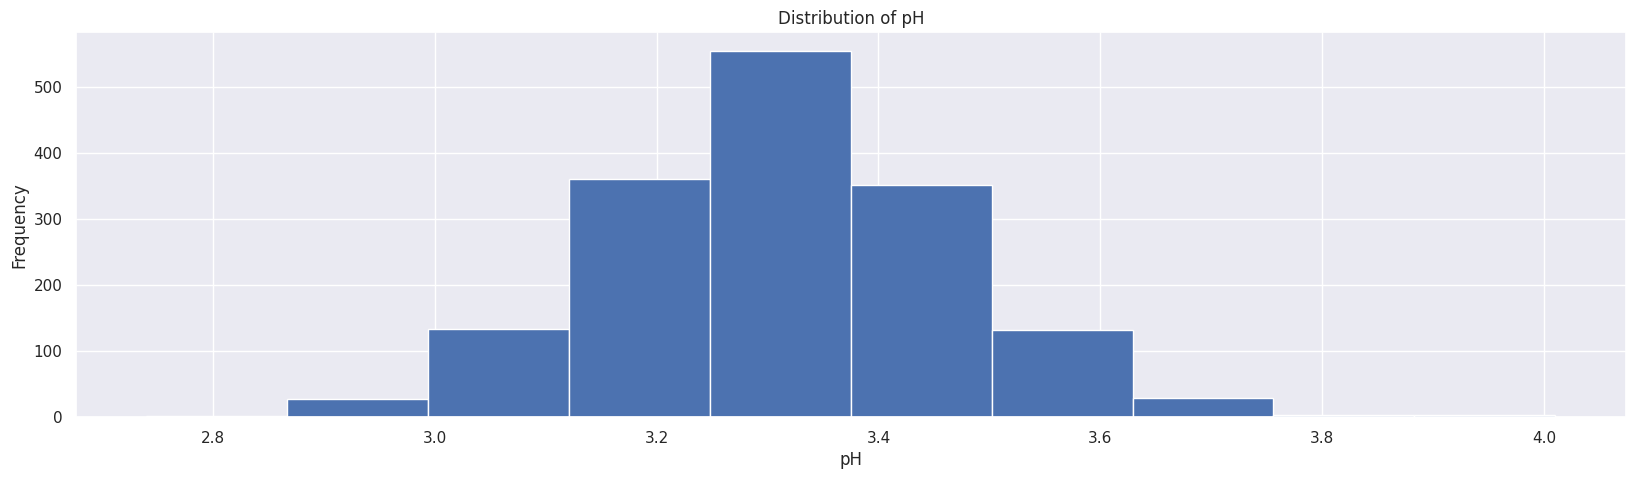

In [ ]:
plt.figure()
plt.hist(df['pH'], bins=10)
plt.title("Distribution of pH")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()


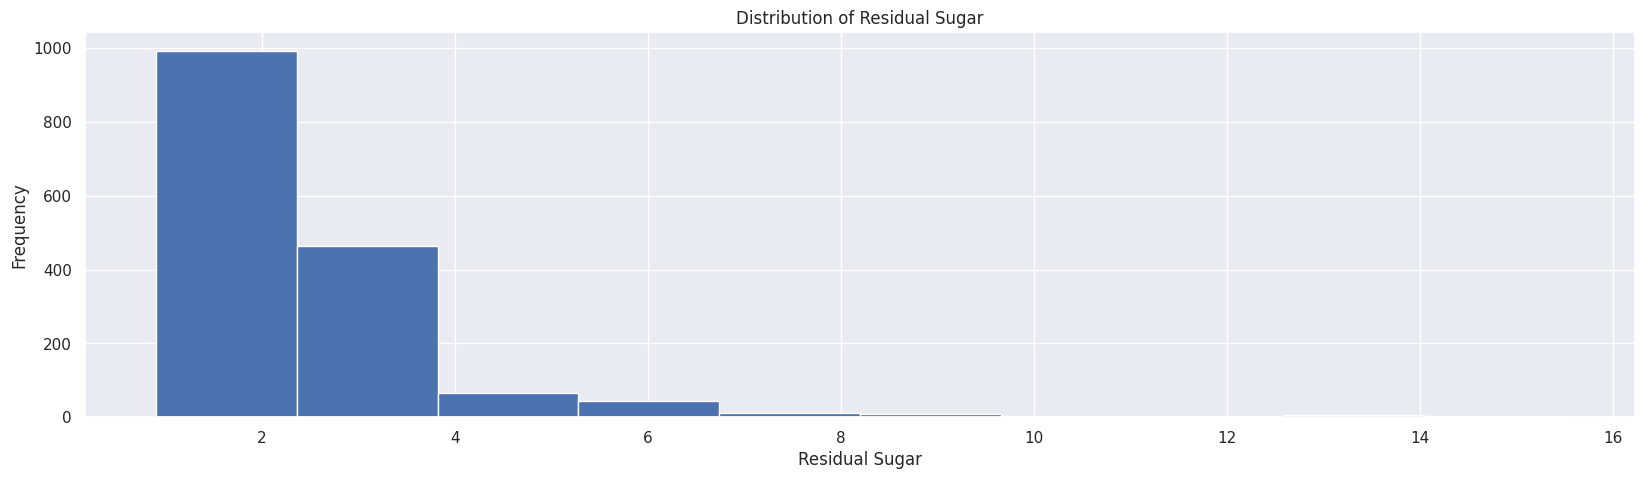

In [ ]:
plt.figure()
plt.hist(df['residual sugar'], bins=10)
plt.title("Distribution of Residual Sugar")
plt.xlabel("Residual Sugar")
plt.ylabel("Frequency")
plt.show()

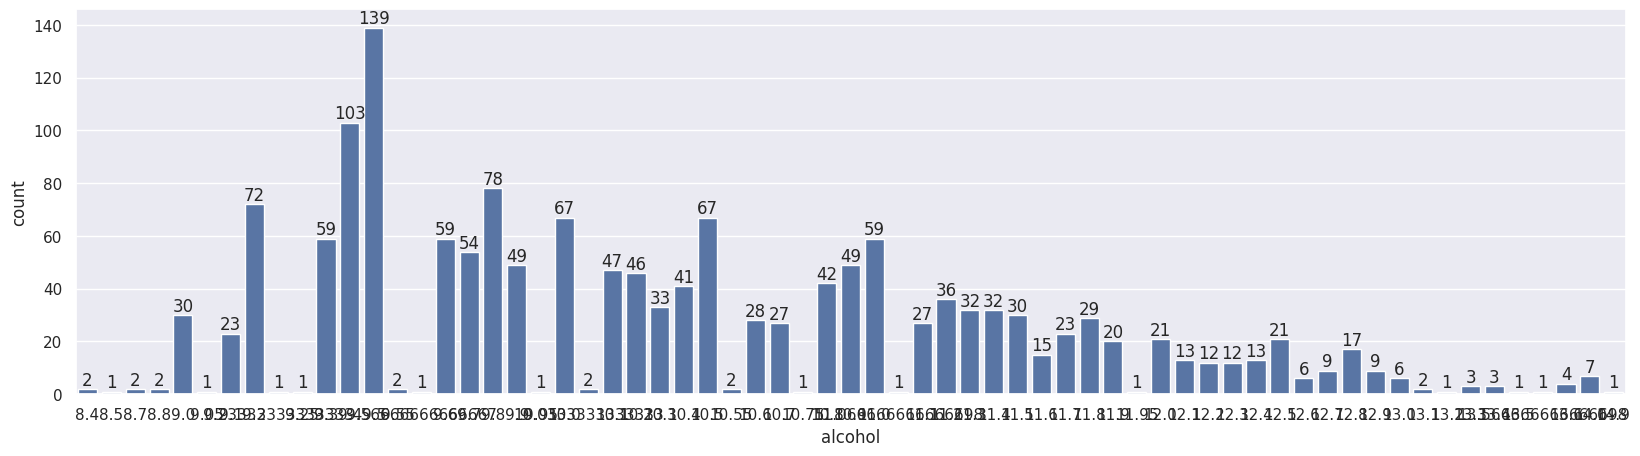

In [ ]:
import seaborn as sns
ax=sns.countplot(x='alcohol',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

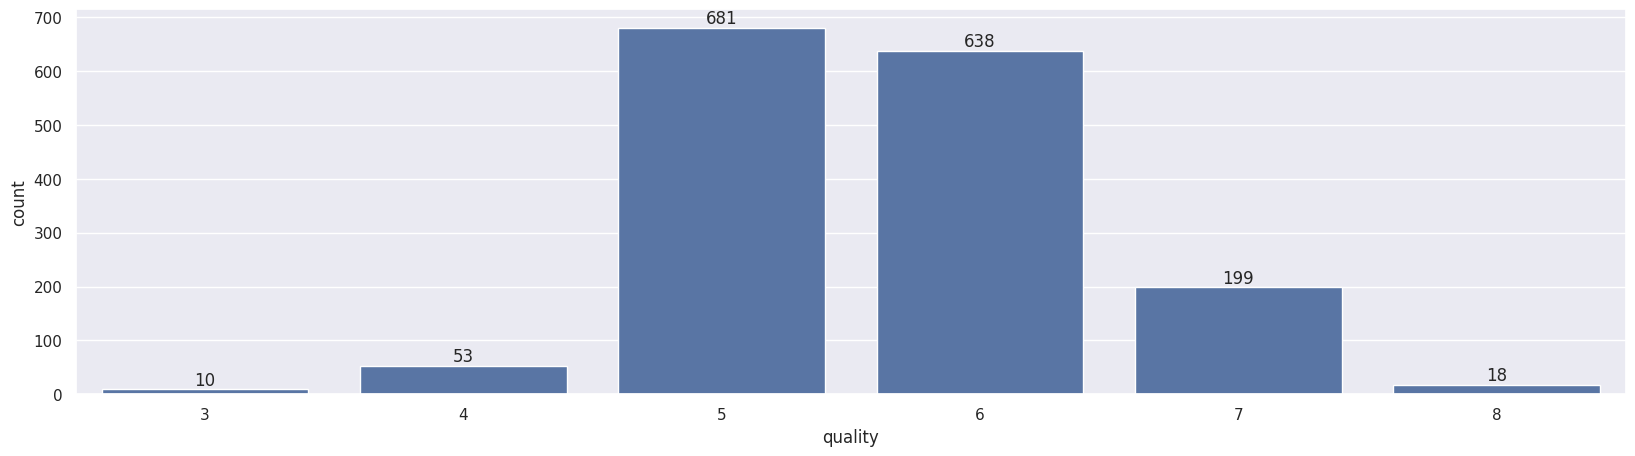

In [ ]:
ax=sns.countplot(x='quality',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

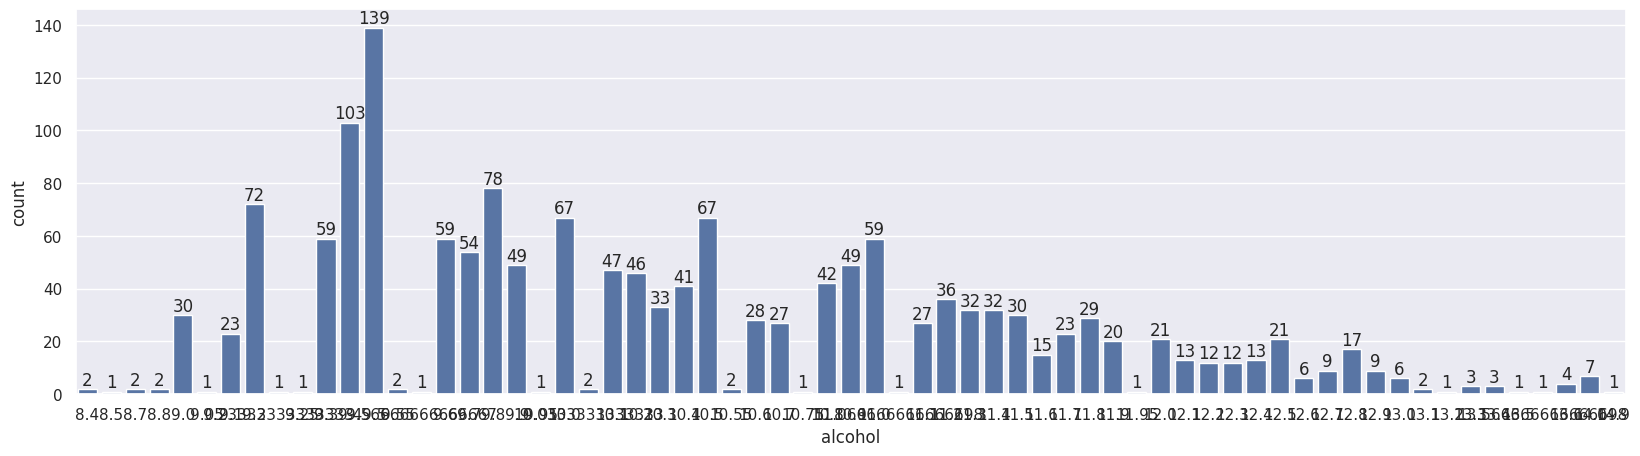

In [ ]:
ax=sns.countplot(x='alcohol',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

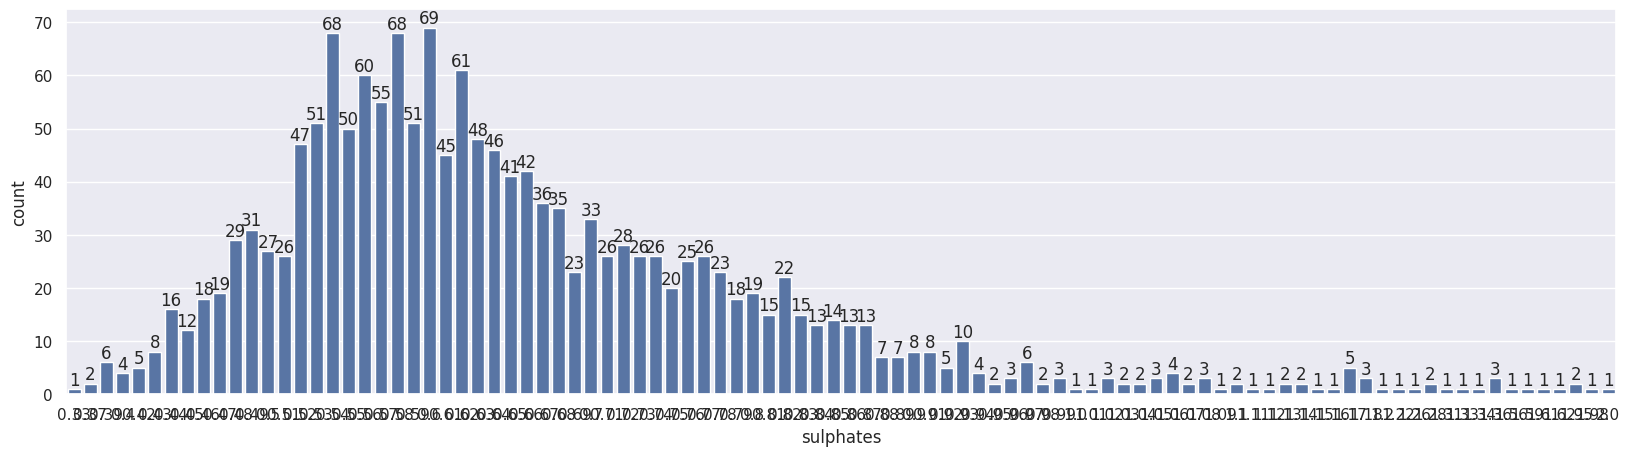

In [ ]:
ax=sns.countplot(x='sulphates',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

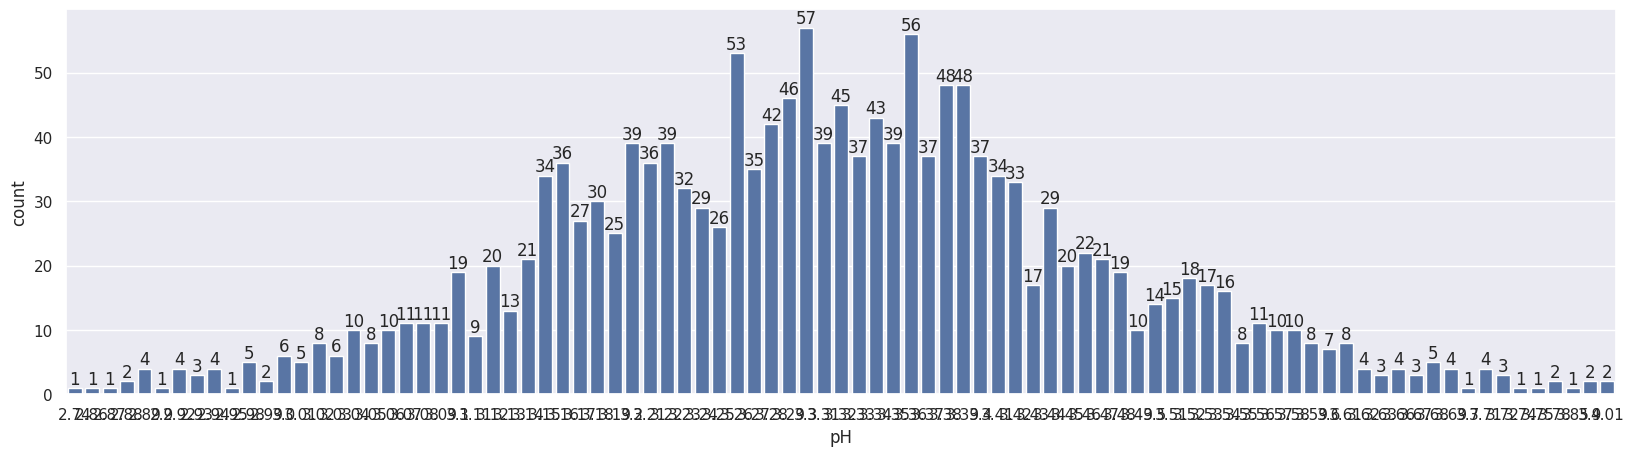

In [ ]:
ax=sns.countplot(x='pH',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

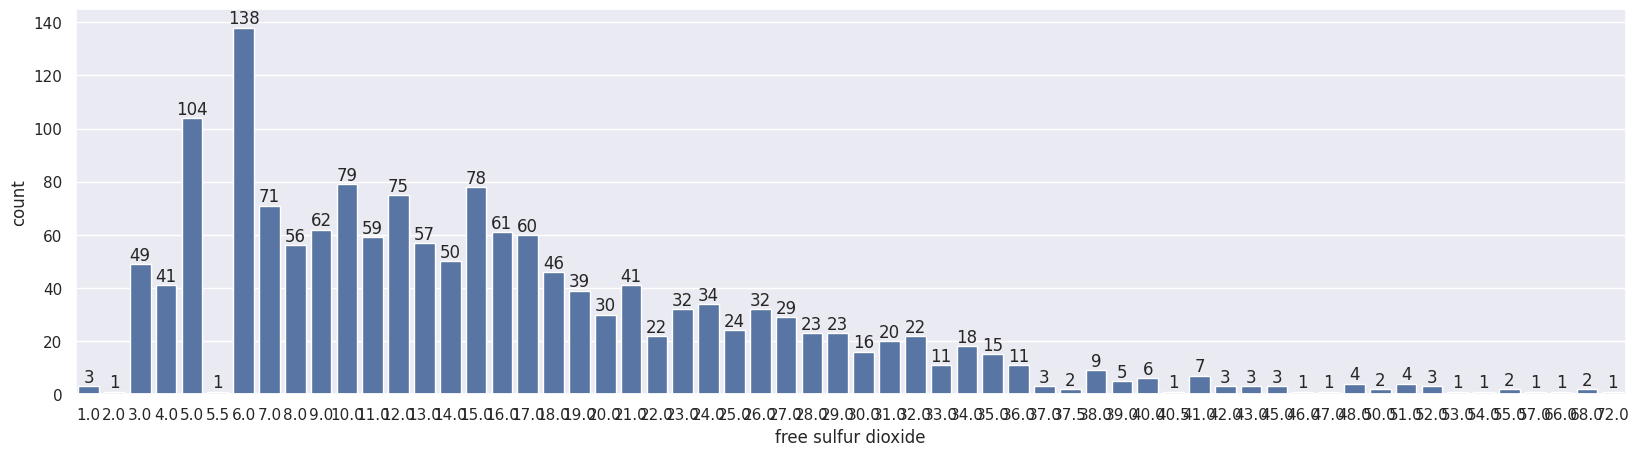

In [ ]:
ax=sns.countplot(x='free sulfur dioxide',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

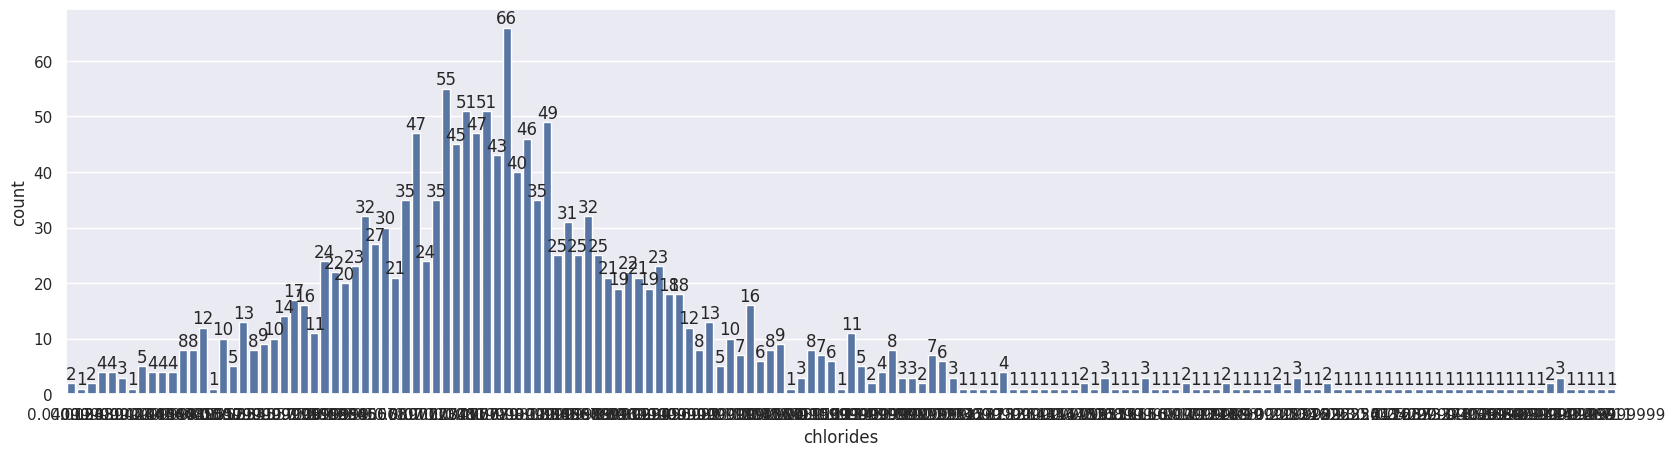

In [ ]:
ax=sns.countplot(x='chlorides',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='quality', ylabel='pH'>

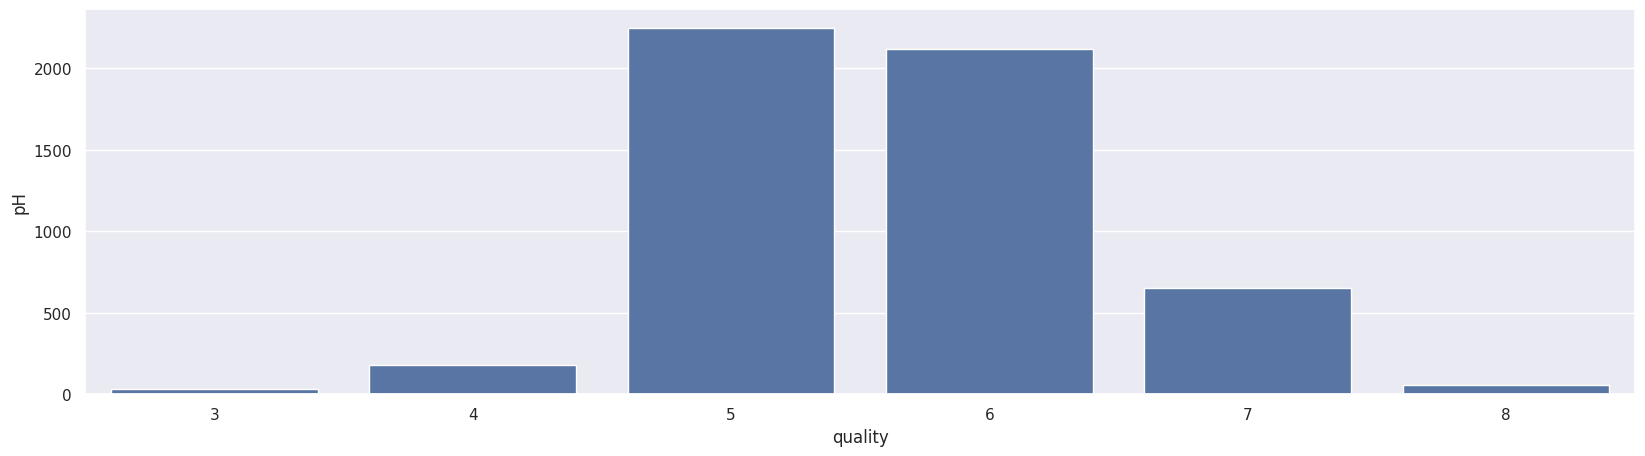

In [ ]:
#quality vs pH
chem=df.groupby(['quality'],as_index=False)['pH'].sum().sort_values(by='pH',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='quality',y='pH',data=chem)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

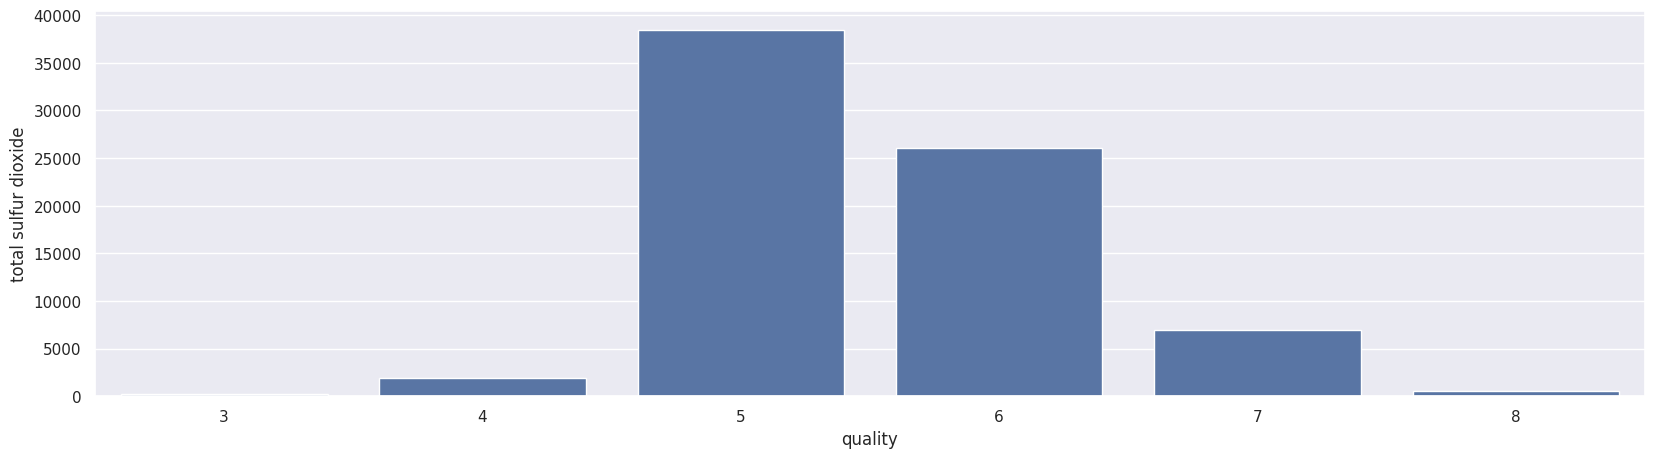

In [ ]:
#quality vs total sulfur dioxide
chem=df.groupby(['quality'],as_index=False)['total sulfur dioxide'].sum().sort_values(by='total sulfur dioxide',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='quality',y='total sulfur dioxide',data=chem)

<Axes: xlabel='quality', ylabel='fixed acidity'>

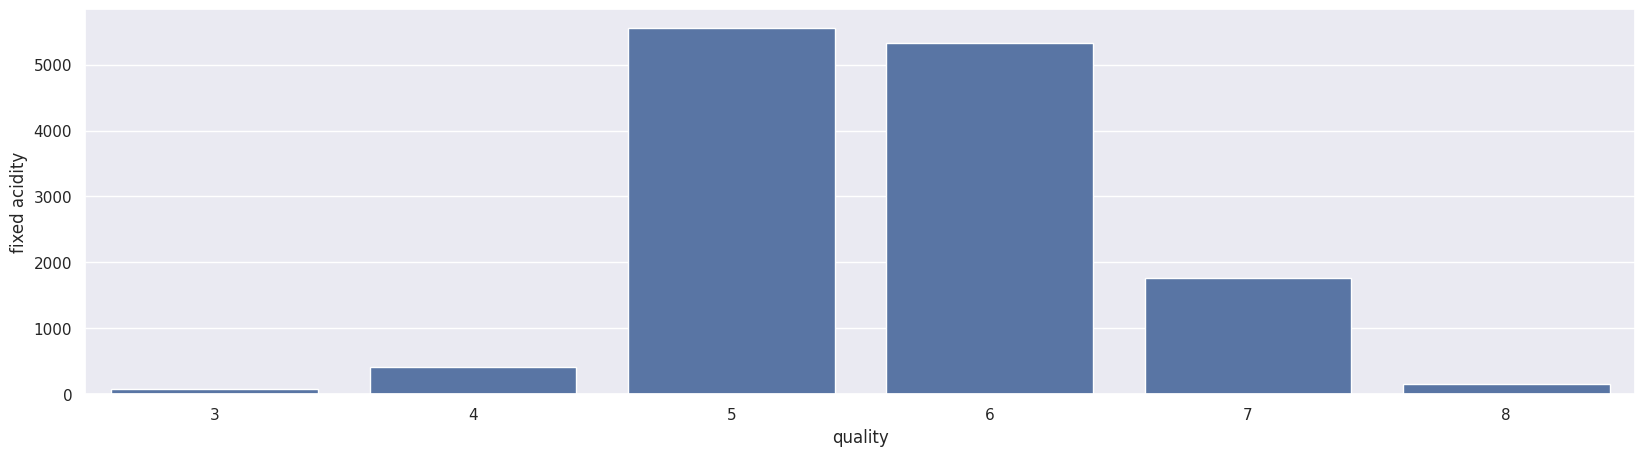

In [ ]:
#quality vs fixed acidity
chem=df.groupby(['quality'],as_index=False)['fixed acidity'].sum().sort_values(by='fixed acidity',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='quality',y='fixed acidity',data=chem)

<Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

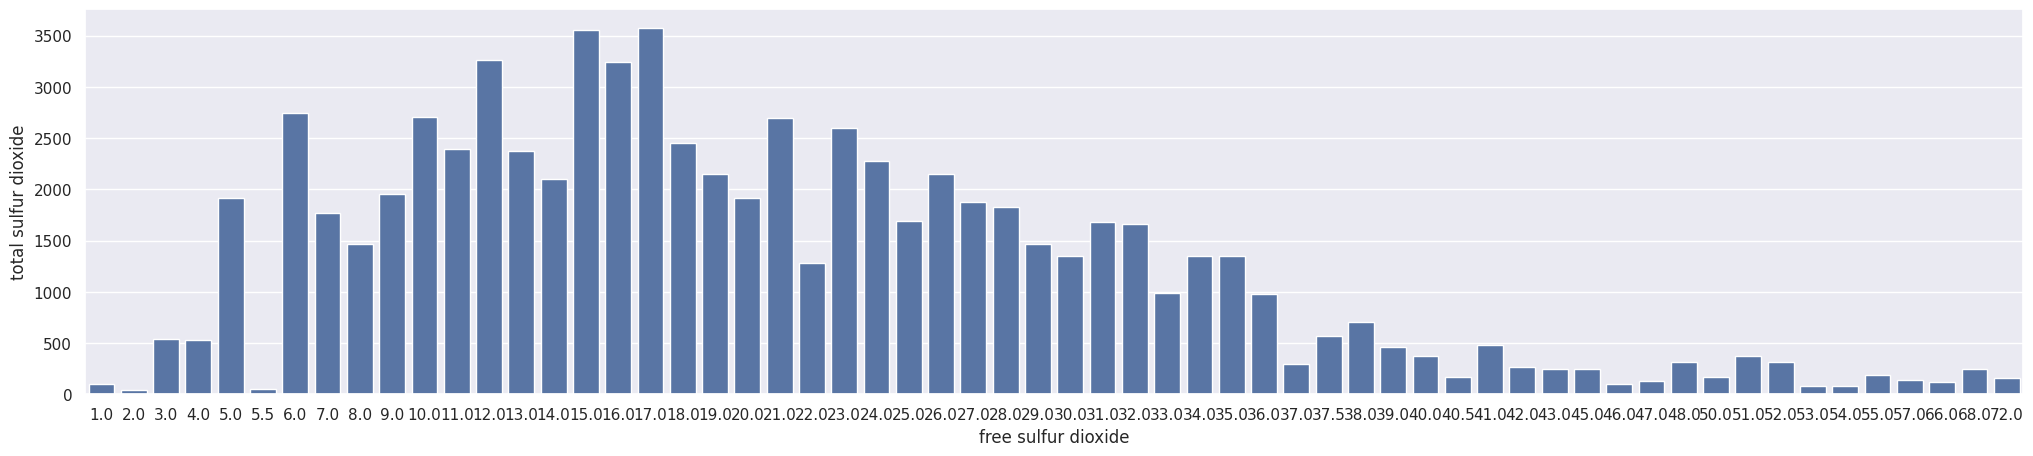

In [ ]:
chem=df.groupby(['free sulfur dioxide'],as_index=False)['total sulfur dioxide'].sum().sort_values(by='total sulfur dioxide',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='free sulfur dioxide',y='total sulfur dioxide',data=chem)

<Axes: xlabel='sulphates', ylabel='chlorides'>

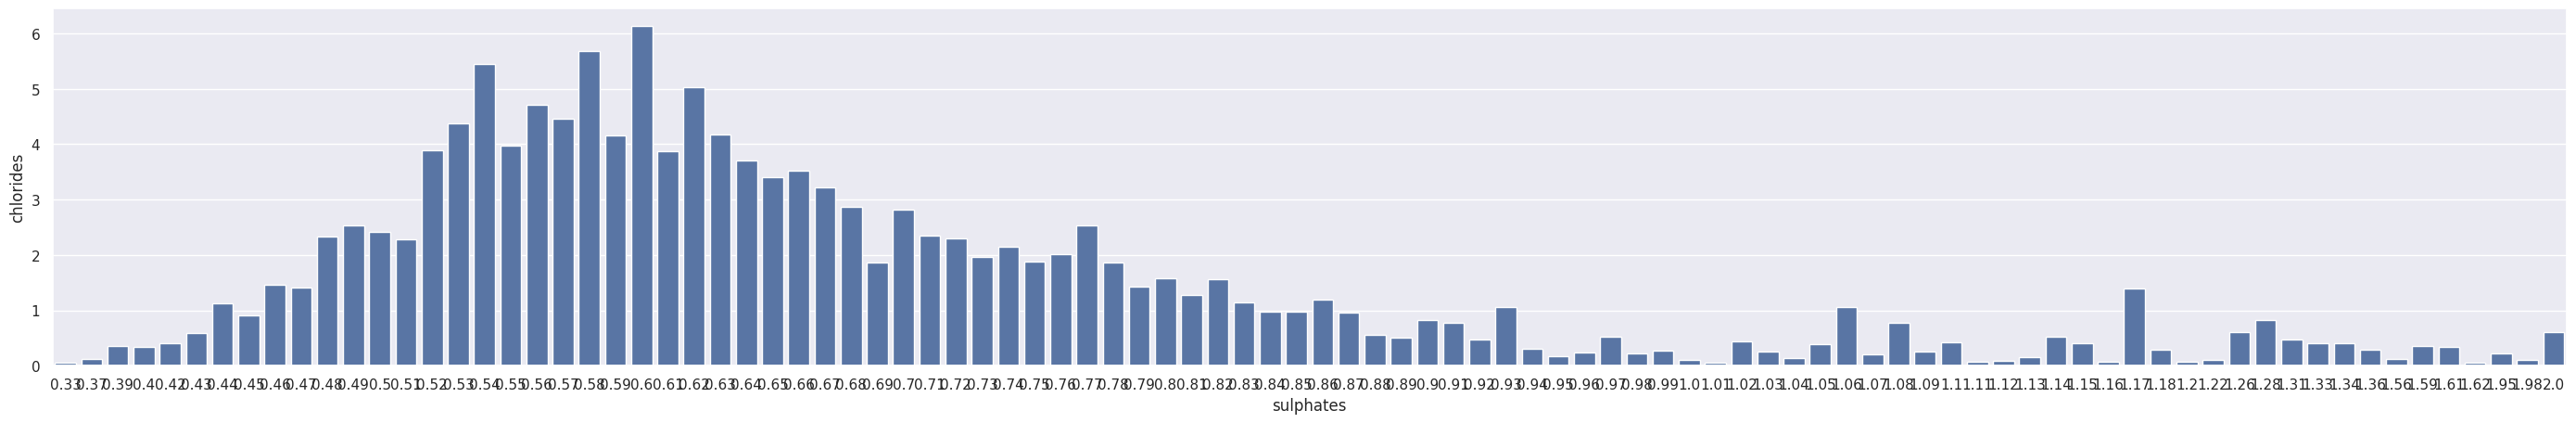

In [ ]:
chem=df.groupby(['sulphates'],as_index=False)['chlorides'].sum().sort_values(by='chlorides',ascending=False)
sns.set(rc={'figure.figsize':(35,5)})
sns.barplot(x='sulphates',y='chlorides',data=chem)

<Axes: xlabel='alcohol', ylabel='pH'>

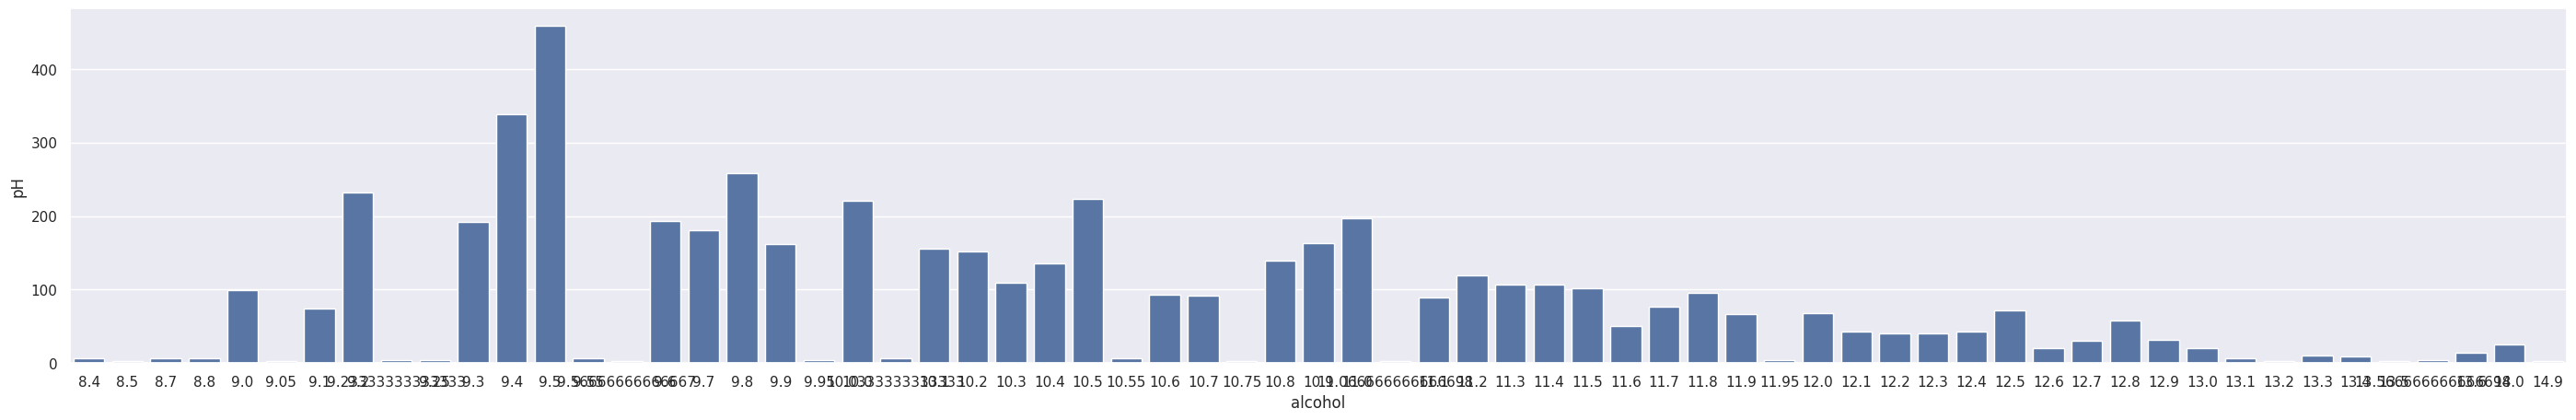

In [ ]:
#alcohol vs pH
chem=df.groupby(['alcohol'],as_index=False)['pH'].sum().sort_values(by='pH',ascending=False)
sns.set(rc={'figure.figsize':(35,5)})
sns.barplot(x='alcohol',y='pH',data=chem)